In [27]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, HTML
import numpy as np
import os
import requests
from ete3 import Tree, TreeStyle
import seaborn as sns
import gzip
from Bio import SeqIO
import subprocess
from pathlib import Path
from tqdm.notebook import tqdm

In [28]:
#CHECKM DATA FROM GALAXY
url_checkm = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac86ea31b43000ed2ed/display?to_ext=tabular'
#CHECKM2 DATA FROM GALAXY
url_checkm2 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac80f3a06a8ad0904d7/display?to_ext=tabular'
#GTDB DATA FROM GALAXY
url_gtdb = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac895e875484621953d/display?to_ext=tsv'
#GTDB TREE FILE FORM GALAXY
gtdb_tree1 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac87be4e0c1ed43f380/display?to_ext=newick'
gtdb_tree2 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac856cba0214e17b075/display?to_ext=newick'
gtdb_tree3 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8d3925c10a0717671/display?to_ext=newick'
gtdb_tree4 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac88aeaaa955d7e47a3/display?to_ext=newick'
gtdb_tree5 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8d6540322dbd46c8a/display?to_ext=newick'
gtdb_tree6 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8b260ceae942b2e9c/display?to_ext=newick'
#GTDB USER MSA FILES
gtdb_binette_1 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac878b1ac90fe2670c7/display?to_ext=fasta.gz'
gtdb_binette_2 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac872d2d466d584417f/display?to_ext=fasta.gz'
gtdb_binette_3 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8e4fa176ed8afa02c/display?to_ext=fasta.gz'
gtdb_drep = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8fc9c7955e3d90b9a/display?to_ext=fasta.gz'
#DREP DATA FROM GALAXY
drep_cdb = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac88b38f3668ceee538/display?to_ext=csv'
#COVERM LINKS
coverm_sample_1 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8ac3eb48ef1e8353f/display?to_ext=tabular'
coverm_sample_2 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac88d1a660a69aed4f4/display?to_ext=tabular'
coverm_sample_3 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8314d734e9b9d6aa3/display?to_ext=tabular'
drep_coverm = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8e2b983750258aaa0/display?to_ext=tabular'

In [29]:
# DOWNLOAD FILES IF NEEDED

#need_to_download = [gtdb_tree1, gtdb_tree2, gtdb_tree3, gtdb_tree4, gtdb_tree5, gtdb_tree6]

need_to_download = [gtdb_binette_1, gtdb_drep]

for i, url in enumerate(need_to_download):

    local_filename = f'gtdb_user_msa{i}.fasta.gz'

    print(f'File exists? {os.path.exists(local_filename)}')

    if not os.path.exists(local_filename):
        response = requests.get(url)
        with open(local_filename, 'wb') as f:
            f.write(response.content)
        print(f'File was downloaded and saved as {local_filename}')


File exists? False
File was downloaded and saved as gtdb_user_msa0.fasta.gz
File exists? False
File was downloaded and saved as gtdb_user_msa1.fasta.gz


In [30]:
df_checkm = pd.read_csv(url_checkm, sep='\t')

print(df_checkm.columns)
print(df_checkm.shape)

html_checkm = df_checkm.to_html(index=False)

scrollable_html = f'''
<div style='height: 400px; overflow: auto;'>
    {html_checkm}
</div>
'''
display(HTML(scrollable_html))

df_checkm2 = pd.read_csv(url_checkm2, sep='\t')

print(df_checkm2.columns)
print(df_checkm2.shape)

html_checkm2 = df_checkm2.to_html(index=False)

scrollable_html = f'''
<div style='height: 400px; overflow: auto;'>
    {html_checkm2}
</div>
'''
display(HTML(scrollable_html))

df_gtdb = pd.read_csv(url_gtdb, sep='\t')

print(df_gtdb.columns)
print(df_gtdb.shape)

html_gtdb = df_gtdb.to_html(index=False)

scrollable_html = f'''
<div style='height: 400px; overflow: auto;'>
    {html_gtdb}
</div>
'''
display(HTML(scrollable_html))

df_drep = pd.read_csv(drep_cdb, sep=',')

print(df_drep.columns)
print(df_drep.shape)

html_drep = df_drep.to_html(index=False)

scrollable_html = f'''
<div style='height: 400px; overflow: auto;'>
    {html_drep}
</div>
'''
display(HTML(scrollable_html))

Index(['Bin Id', 'Marker lineage', '# genomes', '# markers', '# marker sets',
       '0', '1', '2', '3', '4', '5+', 'Completeness', 'Contamination',
       'Strain heterogeneity'],
      dtype='object')
(134, 14)


Index(['Name', 'Completeness', 'Contamination', 'Completeness_Model_Used',
       'Translation_Table_Used', 'Coding_Density', 'Contig_N50',
       'Average_Gene_Length', 'Genome_Size', 'GC_Content',
       'Total_Coding_Sequences', 'Total_Contigs', 'Max_Contig_Length',
       'Additional_Notes'],
      dtype='object')
(134, 14)


Index(['user_genome', 'classification', 'closest_genome_reference',
       'closest_genome_reference_radius', 'closest_genome_taxonomy',
       'closest_genome_ani', 'closest_genome_af',
       'closest_placement_reference', 'closest_placement_radius',
       'closest_placement_taxonomy', 'closest_placement_ani',
       'closest_placement_af', 'pplacer_taxonomy', 'classification_method',
       'note',
       'other_related_references(genome_id,species_name,radius,ANI,AF)',
       'msa_percent', 'translation_table', 'red_value', 'warnings'],
      dtype='object')
(134, 20)


Index(['genome', 'secondary_cluster', 'threshold', 'cluster_method',
       'comparison_algorithm', 'primary_cluster'],
      dtype='object')
(155, 6)


   Completeness (%)  Contamination (%)
0             98.29               1.99
1             88.35               1.69
2             96.95               1.22
3             92.38               3.20
4             92.59               1.28


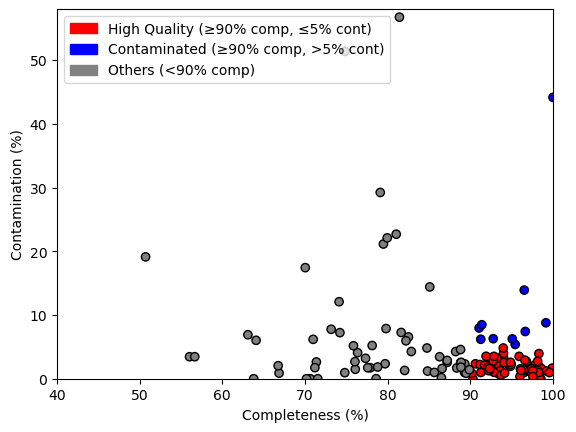

In [31]:
#CONTAMINATION x COMPLETNESS

plot_df = df_checkm.loc[:,['Completeness', 'Contamination']]

plot_df.rename(columns={'Completeness': 'Completeness (%)', 'Contamination': 'Contamination (%)'}, inplace=True)

print(plot_df.head())


completness = 90.0
contamination = 5.0

conditions = [(plot_df['Completeness (%)'] >= completness) & (plot_df['Contamination (%)'] <= contamination), (plot_df['Completeness (%)'] >= completness) & (plot_df['Contamination (%)'] > contamination)]

choices = ['red', 'blue']

colors = np.select(conditions, choices, default='grey')

plt.scatter(x=plot_df['Completeness (%)'], y=plot_df['Contamination (%)'], c=colors, edgecolor='black')

plt.xlim(max(math.floor((plot_df['Completeness (%)'].min() - 10) / 10) * 10 ,0), 100)
plt.ylim(0, min(math.ceil(plot_df['Contamination (%)'].max() + 1), 100))

plt.xlabel('Completeness (%)')
plt.ylabel('Contamination (%)')

legend_patches = [
    mpatches.Patch(color='red', label='High Quality (≥90% comp, ≤5% cont)'),
    mpatches.Patch(color='blue', label='Contaminated (≥90% comp, >5% cont)'),
    mpatches.Patch(color='grey', label='Others (<90% comp)')
]
plt.legend(handles=legend_patches, loc='best')

plt.show()

   N50(kbp)
0    52.200
1    16.112
2    62.436
3     9.080
4    34.002


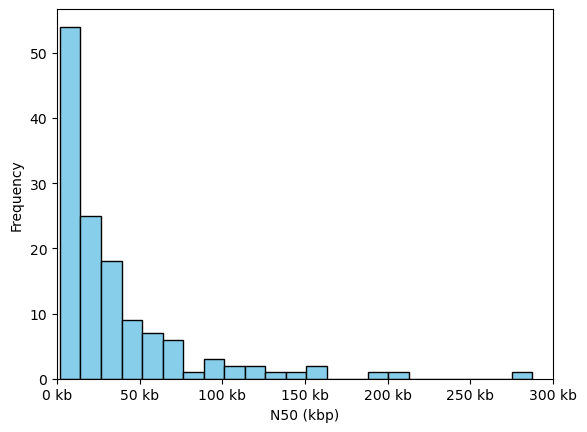

In [32]:
#N50 HISTOGRAM

his_df = df_checkm2.loc[:,['Contig_N50']]

his_df.rename(columns={'Contig_N50': 'N50(kbp)'}, inplace=True)

his_df = his_df / 1000

print(his_df.head())

plt.hist(his_df, bins='auto', color='skyblue', edgecolor='black')

plt.xlim(0, his_df['N50(kbp)'].max())

plt.xlabel('N50 (kbp)')
plt.ylabel('Frequency')

plt.xticks(plt.xticks()[0], [f'{int(x)} kb' for x in plt.xticks()[0]])

plt.show()

   # Contig
0       152
1       328
2        78
3       865
4       176


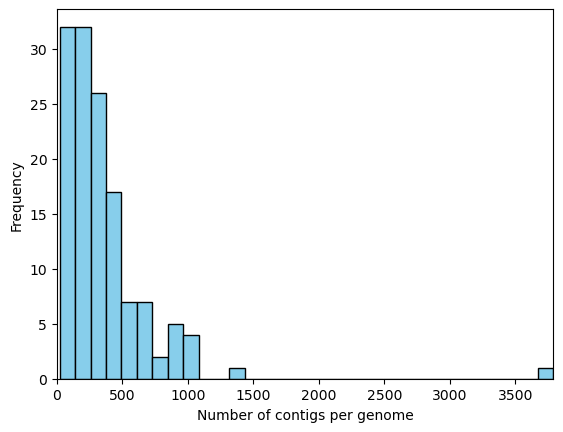

In [33]:
#NUMBER OF CONTIGS HISTOGRAM

his_df = df_checkm2.loc[:,['Total_Contigs']]

his_df.rename(columns={'Total_Contigs': '# Contig'}, inplace=True)

print(his_df.head())

plt.hist(his_df, bins='auto', color='skyblue', edgecolor='black')

plt.xlim(0, his_df['# Contig'].max())

plt.xlabel('Number of contigs per genome')
plt.ylabel('Frequency')

plt.show()

                                   Bin    N50  Total length Assembly  \
0  SRR22878281.fastq_bin_1030637.fasta  52200                4867065   
1  SRR22878281.fastq_bin_1047037.fasta  16112                3654981   
2  SRR22878281.fastq_bin_1048668.fasta  62436                2677092   
3  SRR22878281.fastq_bin_1065179.fasta   9080                5913631   
4  SRR22878281.fastq_bin_1069559.fasta  34002                3943993   

   Longest Contig  Coding Density  
0          183065           0.930  
1           96306           0.887  
2          190839           0.887  
3           38672           0.926  
4           77593           0.935  


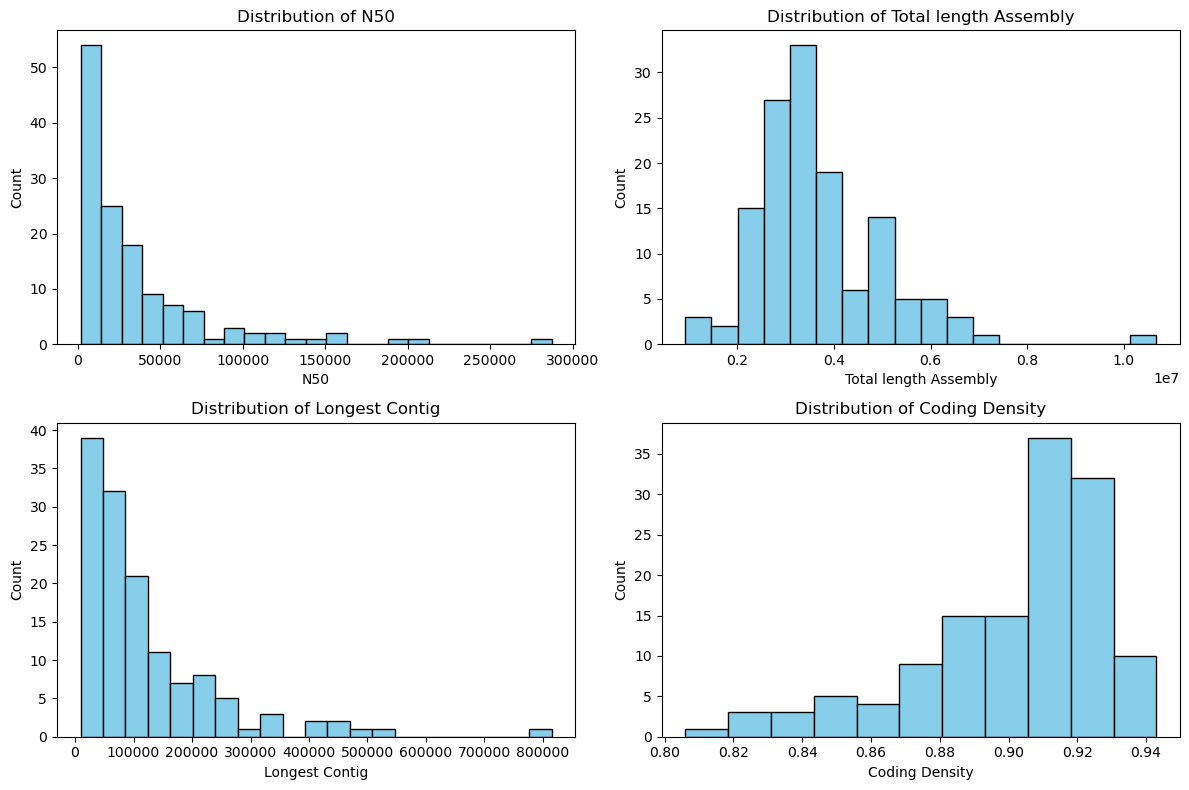

In [34]:
#N50 VALUES x TOTAL LENGTH OF THE ASSEMLBY x LENGTH OF THE LONGEST CONTIG x CODDING DENSITY

plot_df = df_checkm2.loc[:,['Name', 'Contig_N50', 'Genome_Size', 'Max_Contig_Length', 'Coding_Density']]

plot_df.rename(columns={'Name': 'Bin', 'Genome_Size': 'Total length Assembly', 'Contig_N50' : 'N50', 'Max_Contig_Length': 'Longest Contig', 'Coding_Density': 'Coding Density'}, inplace=True)

print(plot_df.head())


metrics = ['N50','Total length Assembly','Longest Contig','Coding Density']

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].hist(plot_df[metric], bins='auto', color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {metric}')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

#NORMALIZED VALUES

#df_norm = plot_df.copy()
#df_norm[metrics] = plot_df[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#fig, axes = plt.subplots(2, 2, figsize=(12,8))
#axes = axes.flatten()

#for i, metric in enumerate(metrics):
    #axes[i].hist(df_norm[metric], bins=20, color='skyblue', edgecolor='black')
    #axes[i].set_title(f'Distribution of {metric} normalized')
    #axes[i].set_xlabel(metric)
    #axes[i].set_ylabel('Count')


#plt.tight_layout()
#plt.show()

                                   Bin             Phylum
0  SRR22878281_fastq_bin_1030637_fasta     Actinomycetota
1  SRR22878281_fastq_bin_1047037_fasta     Pseudomonadota
2  SRR22878281_fastq_bin_1048668_fasta     Pseudomonadota
3  SRR22878281_fastq_bin_1065179_fasta  Verrucomicrobiota
4  SRR22878281_fastq_bin_1069559_fasta     Actinomycetota


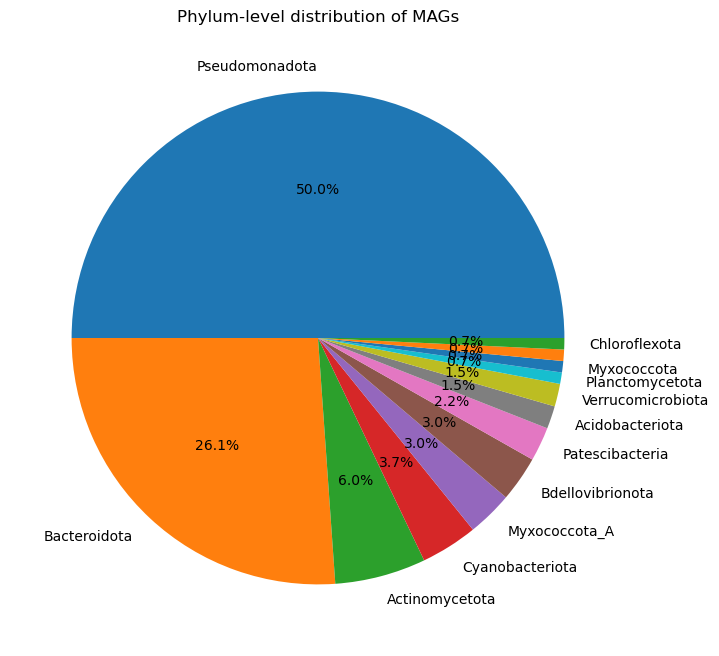

In [35]:
# Phylum-level distribution of MAGs

plot_df = df_gtdb.loc[:,['user_genome', 'classification']]

plot_df.rename(columns={'user_genome': 'Bin', 'classification': 'Phylum'}, inplace=True)

plot_df['Phylum'] = (
    plot_df['Phylum']
    .str.split(';')
    .str[1]
    .str.replace('p__', '', regex=False)
)

plot_df['Phylum'] = plot_df['Phylum'].fillna('Unclassified')

print(plot_df.head())

phylum_counts = plot_df['Phylum'].value_counts()

plt.figure(figsize=(8,8))
phylum_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Phylum-level distribution of MAGs')
plt.show()

#subtrees = [f'gtdb_tree{i}.nwk' for i in range(len(need_to_download))]

#for tfile in subtrees:
    #t = Tree(tfile, format=1, quoted_node_names=True)
    #if full_tree is None:
        #full_tree = t
    #else:
        #full_tree.add_child(t)

#full_tree.write(format=1, outfile='merged_tree.nwk')


#full_tree = Tree('merged_tree.nwk', format=1, quoted_node_names=True)

#ts = TreeStyle()
#ts.mode = 'c'
#ts.show_leaf_name = True
#ts.show_branch_length = False
#ts.show_branch_support = True

#full_tree.render('full_tree.png', tree_style=ts)

                                   Bin Cluster
0  SRR22878281.fastq_bin_1069559.fasta     1_0
1  SRR22878281.fastq_bin_1177133.fasta     2_0
2  SRR22878281.fastq_bin_1070024.fasta     3_0
3   SRR22878281.fastq_bin_952057.fasta     4_0
4     SRR22878281.fastq_bin_6555.fasta     5_0


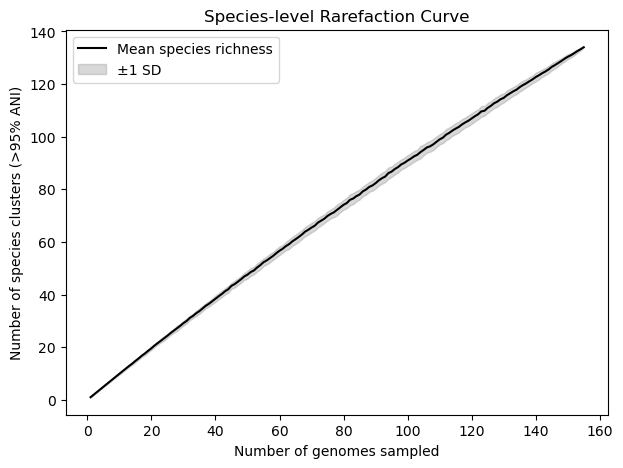

In [36]:
#Species-level (>95% ANI) rarefaction curve

plot_df = df_drep.loc[:,['genome', 'secondary_cluster']]

plot_df.rename(columns={'genome': 'Bin', 'secondary_cluster': 'Cluster'}, inplace=True)

print(plot_df.head())

def rarefaction_curve(df, n_iter=100, step=1):
    genomes = df['Bin'].tolist()
    species_map = dict(zip(df['Bin'], df['Cluster']))
    
    max_depth = len(genomes)
    depths = range(step, max_depth+1, step)
    results = []
    
    for depth in depths:
        species_counts = []
        for _ in range(n_iter):
            subsample = np.random.choice(genomes, size=depth, replace=False)
            clusters = set(species_map[g] for g in subsample)
            species_counts.append(len(clusters))
        results.append({
            'depth': depth,
            'mean_species': np.mean(species_counts),
            'std_species': np.std(species_counts)
        })
    
    return pd.DataFrame(results)


results = rarefaction_curve(plot_df, n_iter=200, step=1)


plt.figure(figsize=(7,5))
plt.plot(results['depth'], results['mean_species'], label='Mean species richness', color='black')
plt.fill_between(results['depth'],
                 results['mean_species']-results['std_species'],
                 results['mean_species']+results['std_species'],
                 color='gray', alpha=0.3, label='±1 SD')
plt.xlabel('Number of genomes sampled')
plt.ylabel('Number of species clusters (>95% ANI)')
plt.title('Species-level Rarefaction Curve')
plt.legend()
plt.show()

                               SRR22878281  SRR22878282  SRR22878283
Genome                                                              
SRR22878281.fastq_bin_1030637     0.271550     0.000000     0.000000
SRR22878281.fastq_bin_1047037     0.195687     0.007059     0.009578
SRR22878281.fastq_bin_1048668     0.736840     0.000000     0.000000
SRR22878281.fastq_bin_1065179     0.130705     0.000000     0.000000
SRR22878281.fastq_bin_1069559     0.205765     0.000000     0.000000


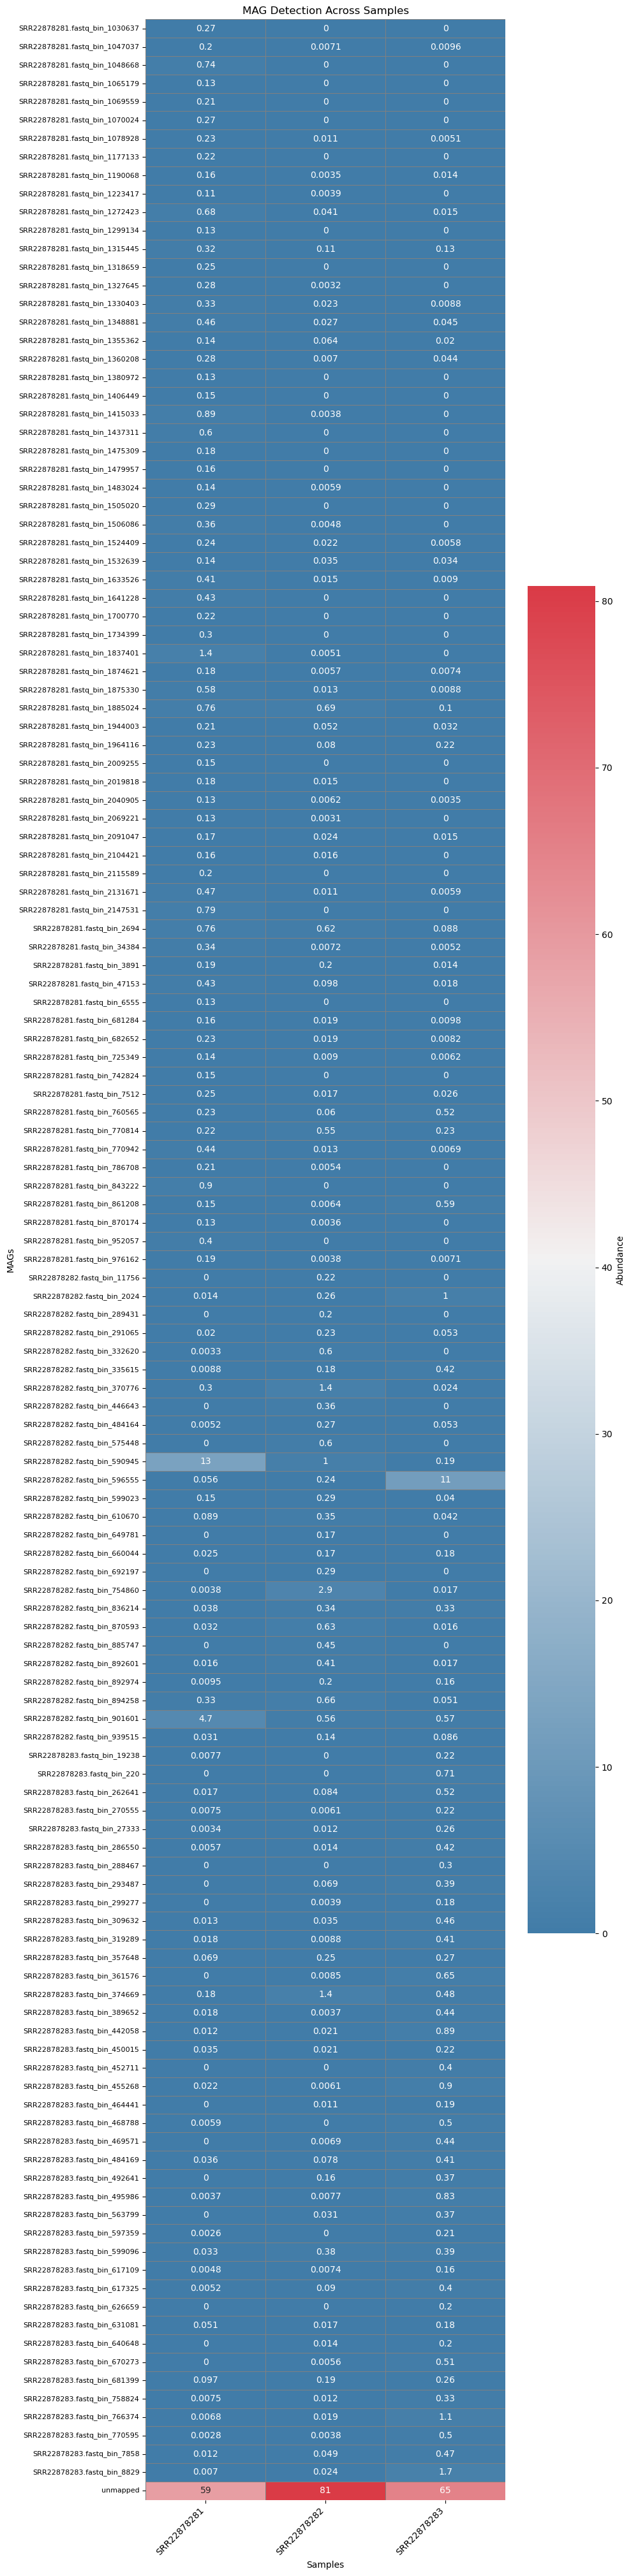

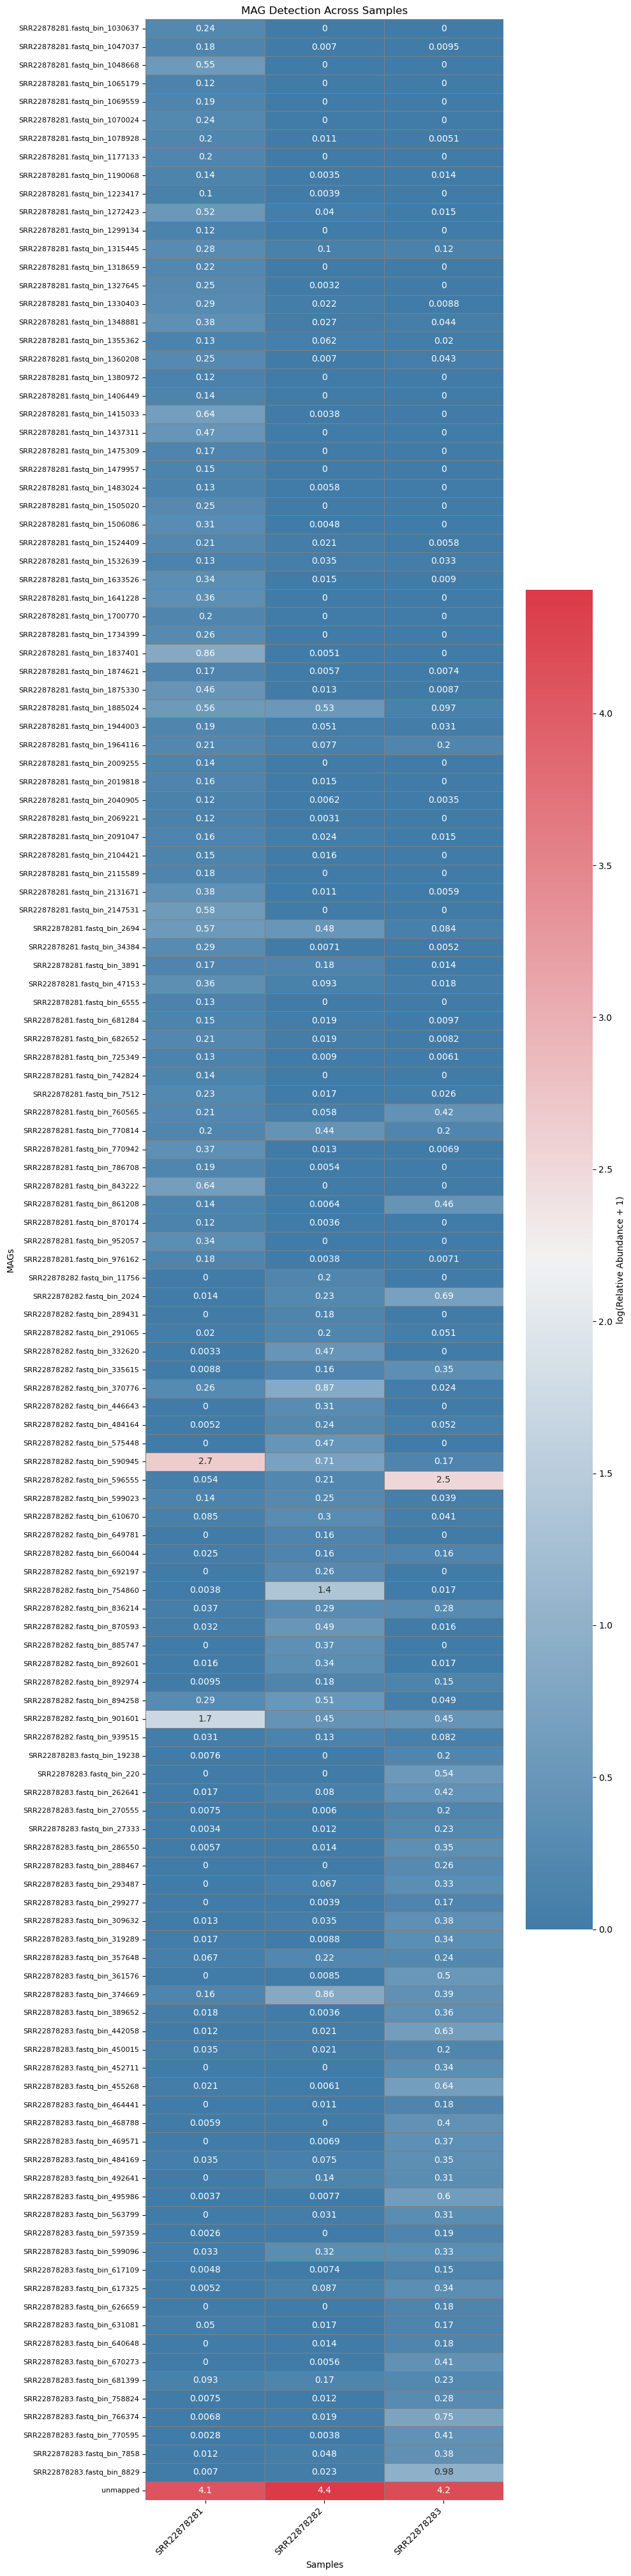

In [37]:
#HEAT MAP

df_sample_1 = pd.read_csv(coverm_sample_1, sep='\t')
df_sample_2 = pd.read_csv(coverm_sample_2, sep='\t')
df_sample_3 = pd.read_csv(coverm_sample_3, sep='\t')

col_to_remove = df_sample_2.columns[-1]
df_sample_2 = df_sample_2.drop(columns=[col_to_remove])

col_to_remove = df_sample_3.columns[-1]
df_sample_3 = df_sample_3.drop(columns=[col_to_remove])

col_to_remove = df_sample_1.columns[-1]
df_sample_1 = df_sample_1.drop(columns=[col_to_remove])

merged = df_sample_1.merge(df_sample_2, on='Genome', how='outer').merge(df_sample_3, on='Genome', how='outer')

merged.columns = merged.columns.str.split('.').str[0]

merged = merged.set_index('Genome')
merged = merged.apply(pd.to_numeric, errors='coerce')
merged = merged.fillna(0)

print(merged.head())

num_bins, num_samples = merged.shape

plt.figure(figsize=(max(10, num_samples*1.2), max(6, num_bins*0.3)))

sns.heatmap(merged, cmap= sns.diverging_palette(240, 10, as_cmap=True), annot=True, cbar_kws={'label': 'Abundance'}, linewidths=0.5,linecolor='gray')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=8)
plt.title('MAG Detection Across Samples')
plt.xlabel('Samples')
plt.ylabel('MAGs')
plt.tight_layout()
plt.show()

plt.figure(figsize=(max(10, num_samples*1.2), max(6, num_bins*0.3)))

sns.heatmap(np.log1p(merged), cmap= sns.diverging_palette(240, 10, as_cmap=True), annot=True, cbar_kws={'label': 'log(Relative Abundance + 1)'}, linewidths=0.5,linecolor='gray')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=8)
plt.title('MAG Detection Across Samples')
plt.xlabel('Samples')
plt.ylabel('MAGs')
plt.tight_layout()
plt.show()

                               SRR22878281  SRR22878282  SRR22878283
Genome                                                              
SRR22878281.fastq_bin_1030637     1.853086     0.000000     0.000000
SRR22878281.fastq_bin_1047037     1.349554     0.114938     0.077191
SRR22878281.fastq_bin_1048668     5.013659     0.000000     0.000000
SRR22878281.fastq_bin_1065179     0.913422     0.000000     0.000000
SRR22878281.fastq_bin_1069559     1.404645     0.000000     0.000000


/tmp/ipykernel_1501/194460125.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_log = merged.applymap(lambda x: np.log2(x+1))


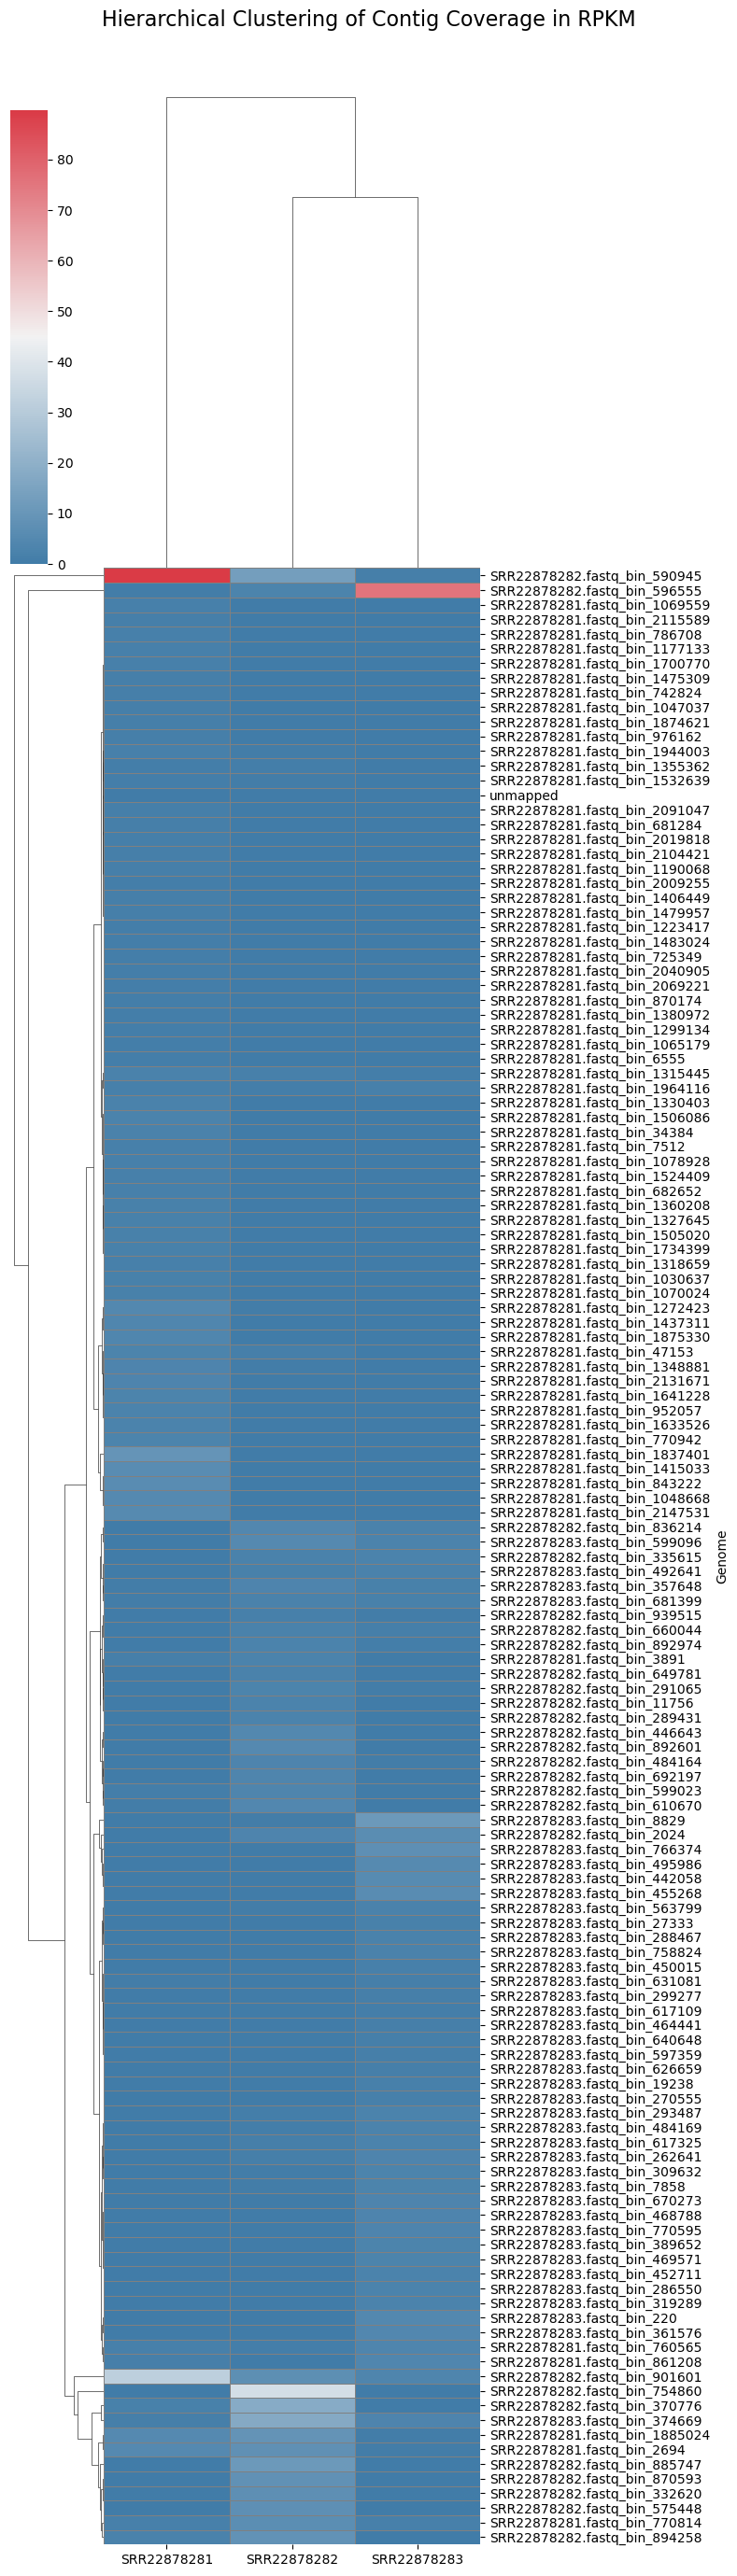

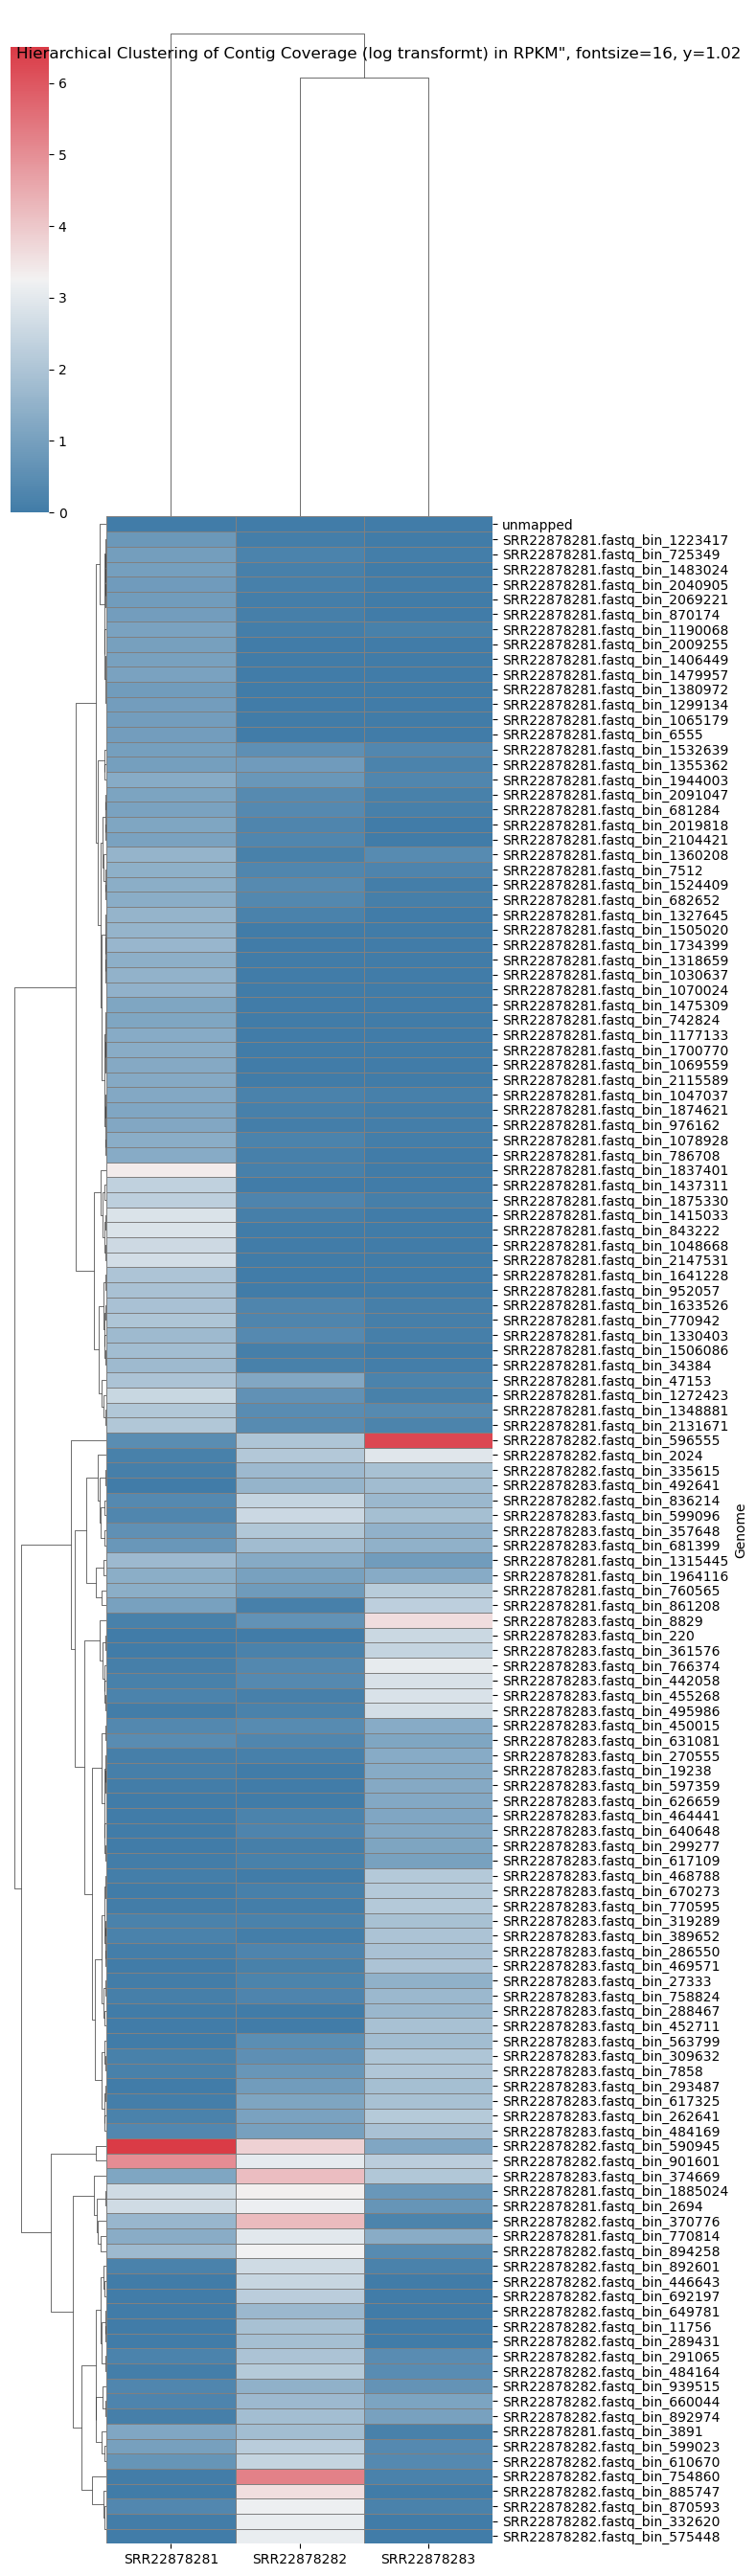

In [38]:
#Hierarchical clustering of sample reads mapped to contig regions in genomes

df_sample_1 = pd.read_csv(coverm_sample_1, sep='\t')
df_sample_2 = pd.read_csv(coverm_sample_2, sep='\t')
df_sample_3 = pd.read_csv(coverm_sample_3, sep='\t')

col_to_remove = df_sample_2.columns[1]
df_sample_2 = df_sample_2.drop(columns=[col_to_remove])

col_to_remove = df_sample_3.columns[1]
df_sample_3 = df_sample_3.drop(columns=[col_to_remove])

col_to_remove = df_sample_1.columns[1]
df_sample_1 = df_sample_1.drop(columns=[col_to_remove])

merged = df_sample_1.merge(df_sample_2, on='Genome', how='outer').merge(df_sample_3, on='Genome', how='outer')

merged.columns = merged.columns.str.split('.').str[0]

merged = merged.set_index('Genome')
merged = merged.apply(pd.to_numeric, errors='coerce')
merged = merged.fillna(0)

print(merged.head())

merged_log = merged.applymap(lambda x: np.log2(x+1))

n_rows, n_cols = merged.shape
fig_w = max(8, n_cols * 0.5)
fig_h = max(8, n_rows * 0.2)

g = sns.clustermap(
    merged,
    metric='euclidean',
    method='ward',
    cmap= sns.diverging_palette(240, 10, as_cmap=True),
    figsize=(fig_w, fig_h),
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='gray'
)

g.fig.suptitle('Hierarchical Clustering of Contig Coverage in RPKM', fontsize=16, y=1.02)

plt.show()

g = sns.clustermap(
    merged_log,
    metric='euclidean',
    method='ward',
    cmap= sns.diverging_palette(240, 10, as_cmap=True),
    figsize=(fig_w, fig_h),
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='gray'
)

g.fig.suptitle('Hierarchical Clustering of Contig Coverage (log transformt) in RPKM", fontsize=16, y=1.02')

plt.show()

In [ ]:
#Taxonomic diversity with Maximum likelihood tree of representative genomes

binette_checkm_1 = pd.read_csv('https://usegalaxy.eu/api/datasets/26c75dcccb616ac87cfa62fbc717c8a5/display?to_ext=tabular', sep='\t')
#binette_checkm_2 = pd.read_csv('https://usegalaxy.eu/api/datasets/26c75dcccb616ac80b9a42bfc6040416/display?to_ext=tabular', sep='\t')
#binette_checkm_3 = pd.read_csv('https://usegalaxy.eu/api/datasets/26c75dcccb616ac882ee3c31ab709cdc/display?to_ext=tabular', sep='\t')

checkm_binette_df_1 = binette_checkm_1.loc[:,['Name',  'Completeness',  'Contamination']]
#checkm_binette_df_2 = binette_checkm_2.loc[:,['Name',  'Completeness',  'Contamination']]
#checkm_binette_df_3 = binette_checkm_3.loc[:,['Name',  'Completeness',  'Contamination']]

checkm_binette_df_1.rename(columns={'Name': 'Bin'}, inplace=True)
#checkm_binette_df_2.rename(columns={'Name': 'Bin'}, inplace=True)
#checkm_binette_df_3.rename(columns={'Name': 'Bin'}, inplace=True)

drep_checkm = pd.read_csv(url_checkm2, sep='\t')

drep_checkm = drep_checkm.loc[:,['Name',  'Completeness',  'Contamination']]
drep_checkm.rename(columns={'Name': 'Bin'}, inplace=True)

drep_checkm['Binning_Method'] = 'dRep'

#binette_merged = pd.concat([checkm_binette_df_1, checkm_binette_df_2, checkm_binette_df_3], ignore_index=True)

binette_checkm_1['Binning_Method'] = 'Binette'

final_merged = pd.concat([binette_checkm_1, drep_checkm], ignore_index=True)

print(final_merged.head())

# msa_files = [
#     'gtdb_user_msa0.fasta.gz',
#     'gtdb_user_msa1.fasta.gz',
#     'gtdb_user_msa2.fasta.gz',
#     'gtdb_user_msa3.fasta.gz'
# ]

msa_files = [
    'gtdb_user_msa0.fasta.gz',
    'gtdb_user_msa1.fasta.gz'
]

combined_alignment = 'combined_user_msa.fasta'

with open(combined_alignment, 'w') as out_f:
    for msa in msa_files:
        prefix = Path(msa).stem
        with gzip.open(msa, 'rt') as handle:
            nseqs = sum(1 for _ in SeqIO.parse(handle, 'fasta'))
        with gzip.open(msa, 'rt') as handle:
            for record in tqdm(SeqIO.parse(handle, 'fasta'), total=nseqs, desc=f'Reading {msa}'):
                record.id = f'{prefix}_{record.id}'
                record.description = ''
                SeqIO.write(record, out_f, 'fasta')

print(f'✅ Combined alignment written to {combined_alignment}')



subprocess.run([
    'iqtree3',
    '-s', combined_alignment,
    '-m', 'MFP',
    '-bb', '1000',
    '-alrt', '1000',
    '-nt', 'AUTO',
    '-pre', 'combined_tree'
])

print('✅ Tree built: combined_tree.treefile')

outdir = Path('itol_annotations')
outdir.mkdir(exist_ok=True)

binning_methods = final_merged['Binning_Method'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # extend if needed
method_color_map = {m: colors[i % len(colors)] for i, m in enumerate(binning_methods)}

with open(outdir / 'color_strip_binning.txt', 'w') as f:
    f.write('DATASET_COLORSTRIP\n')
    f.write('SEPARATOR TAB\n')
    f.write('DATASET_LABEL\tBinning Method\n')
    f.write('COLOR\t#ff0000\n')
    f.write('LEGEND_TITLE\tBinning\n')
    f.write(f"LEGEND_SHAPES\t{','.join(['1']*len(binning_methods))}\n")
    f.write(f"LEGEND_COLORS\t{','.join(method_color_map[m] for m in binning_methods)}\n")
    f.write(f"LEGEND_LABELS\t{','.join(binning_methods)}\n")
    f.write('DATA\n')
    for _, row in final_merged.iterrows():
        f.write(f"{row['Bin']}\t{method_color_map[row['Binning_Method']]}\n")

def write_multibar(df, column, color, outpath):
    with open(outpath, 'w') as f:
        f.write('DATASET_MULTIBAR\n')
        f.write('SEPARATOR TAB\n')
        f.write(f'DATASET_LABEL\t{column}\n')
        f.write(f'COLOR\t{color}\n')
        f.write(f'FIELD_COLORS\t{color}\n')
        f.write('DATA\n')
        for _, row in df.iterrows():
            f.write(f"{row['Bin']}\t{row[column]}\n")

write_multibar(final_merged, 'Completeness', '#1f77b4', outdir / 'bar_completeness.txt')
write_multibar(final_merged, 'Contamination', '#d62728', outdir / 'bar_contamination.txt')

print('✅ iTOL annotation files created in', outdir)

          Name  Completeness  Contamination          Completeness_Model_Used  \
0  bin_1030637         95.14           1.29   Gradient Boost (General Model)   
1  bin_1047037         88.66           0.91  Neural Network (Specific Model)   
2  bin_1048668         99.72           0.06   Gradient Boost (General Model)   
3  bin_1065179         86.52           0.41   Gradient Boost (General Model)   
4  bin_1069559         88.48           1.55   Gradient Boost (General Model)   

   Translation_Table_Used  Coding_Density  Contig_N50  Average_Gene_Length  \
0                    11.0           0.930     52200.0           325.773804   
1                    11.0           0.887     16112.0           303.633941   
2                    11.0           0.887     62436.0           316.796245   
3                    11.0           0.926      9080.0           353.520982   
4                    11.0           0.935     34002.0           320.358221   

   Genome_Size  GC_Content  Total_Coding_Sequences

Reading gtdb_user_msa0.fasta.gz:   0%|          | 0/79 [00:00<?, ?it/s]

Reading gtdb_user_msa1.fasta.gz:   0%|          | 0/134 [00:00<?, ?it/s]

✅ Combined alignment written to combined_user_msa.fasta
IQ-TREE version 3.0.1 for Linux x86 64-bit built Jul  9 2025
Developed by Bui Quang Minh, Thomas Wong, Nhan Ly-Trong, Huaiyan Ren
Contributed by Lam-Tung Nguyen, Dominik Schrempf, Chris Bielow,
Olga Chernomor, Michael Woodhams, Diep Thi Hoang, Heiko Schmidt

Host:    LAPTOP-7RMLPR2D (AVX2, FMA3, 6 GB RAM)
Command: iqtree3 -s combined_user_msa.fasta -m MFP -bb 1000 -alrt 1000 -nt AUTO -pre combined_tree
Seed:    751968 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Tue Sep  2 20:24:04 2025
Kernel:  AVX+FMA - auto-detect threads (8 CPU cores detected)

Reading alignment file combined_user_msa.fasta ... Fasta format detected
Reading fasta file: done in 0.0219313 secs using 47.95% CPU
Alignment most likely contains protein sequences
Constructing alignment: done in 0.040985 secs using 197.4% CPU
Alignment has 213 sequences with 5035 columns, 5034 distinct patterns
4987 parsimony-informative, 19 singleton sites, 29 c